In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import emoji
import re
 
import nltk
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lemmatizer = WordNetLemmatizer()  # initalizing lemmatizer function
pd.set_option('max_colwidth', 400)

In [2]:
%pip install seaborn
!pip install matplotlib
!pip install WordCloud
!pip install scikit-learn
!pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load data
df =pd.read_csv('C:/Users/sprem/Desktop/Project file/cyberbullying_tweets.csv')

In [4]:
df.head(25)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kaya neraka,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is just nasty. #mkr,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bullying:,not_cyberbullying


In [5]:
df.shape

(47692, 2)

In [6]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying


In [7]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK KP that dumb nigger bitch lmao,ethnicity


In [8]:
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [9]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,Maybe I'm reading this document wrong. http://t.co/9ToehGqfEb http://t.co/3Sij3kRJyz,religion
freq,2,7998


In [10]:
# printing number of duplicated tweets
print(df["tweet_text"].duplicated().sum())
  # dropped duplicated tweets
df.drop_duplicates("tweet_text", inplace=True)

1675


In [11]:
# balanced dataset
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7995
age                    7992
ethnicity              7952
not_cyberbullying      7937
gender                 7898
other_cyberbullying    6243
Name: count, dtype: int64

In [12]:
# Data Preprocessing

!pip install nltk
!python -m nltk.downloader wordnet

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sprem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
def remove_emoji(string): # function to remove emojis
    return emoji.replace_emoji(string, '')
df['tweet_text'] = df['tweet_text'].apply(remove_emoji) # removing emojis
df['tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(r'((www\.[^\s]+)|(http\S+))', ' ', x)) # remove URLS
df['tweet_text'] = df['tweet_text'].str.replace(r"[\d_]", ' ', regex=True) # removes digits and underscore (_)
df['tweet_text'] = df['tweet_text'].str.lower() # lowering all characters
df['tweet_text'] = df['tweet_text'].str.replace(r'[^\w\s]', '', regex=True) # remove special characters
df['tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x)) # remove single characters
df['tweet_text'] = df['tweet_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in x.split()])) # lemmatizing

In [14]:
df.head(25)

,tweet_text,cyberbullying_type
0,in other word katandandre your food be crapilicious mkr,not_cyberbullying
1,why be aussietv so white mkr theblock imacelebrityau today sunrise studio neighbour wonderlandten etc,not_cyberbullying
2,xochitlsuckkks classy whore or more red velvet cupcakes,not_cyberbullying
3,jason gio meh thank for the head up but not too concern about another angry dude on twitter,not_cyberbullying
4,rudhoeenglish this be an isis account pretend to be kurdish account like islam it be all lie,not_cyberbullying
5,raja aab quickieleaks yes the test of god be that good or bad or indifferent or weird or whatever it all prove gods existence,not_cyberbullying
6,itu sekolah ya bukan tempat bully ga jauh kaya neraka,not_cyberbullying
7,karma hope it bite kat on the butt she be just nasty mkr,not_cyberbullying
8,stockputout everything but mostly my priest,not_cyberbullying
9,rebecca black drop out of school due to bully,not_cyberbullying


In [15]:
!python -m nltk.downloader stopwords

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sprem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# removing stopwords
stop = stopwords.words('english')
stop.extend(['im','rt']) # adding extra stop words to filter them out
df['tweet_text'] = df['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
df.head(25)

,tweet_text,cyberbullying_type
0,word katandandre food crapilicious mkr,not_cyberbullying
1,aussietv white mkr theblock imacelebrityau today sunrise studio neighbour wonderlandten etc,not_cyberbullying
2,xochitlsuckkks classy whore red velvet cupcakes,not_cyberbullying
3,jason gio meh thank head concern another angry dude twitter,not_cyberbullying
4,rudhoeenglish isis account pretend kurdish account like islam lie,not_cyberbullying
5,raja aab quickieleaks yes test god good bad indifferent weird whatever prove gods existence,not_cyberbullying
6,itu sekolah ya bukan tempat bully ga jauh kaya neraka,not_cyberbullying
7,karma hope bite kat butt nasty mkr,not_cyberbullying
8,stockputout everything mostly priest,not_cyberbullying
9,rebecca black drop school due bully,not_cyberbullying


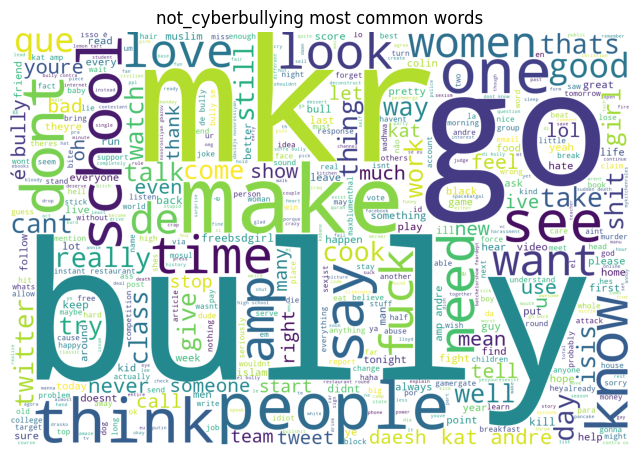

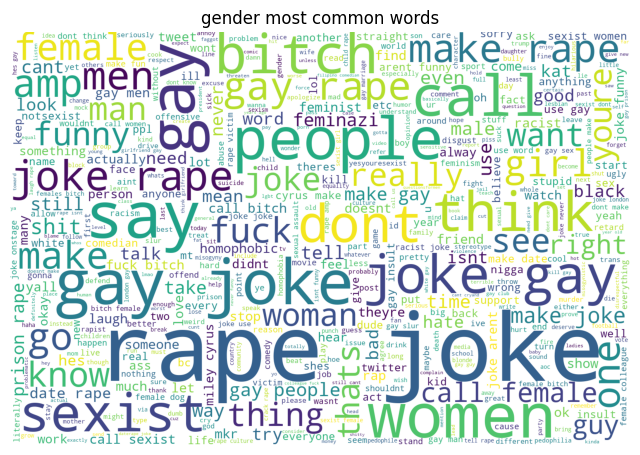

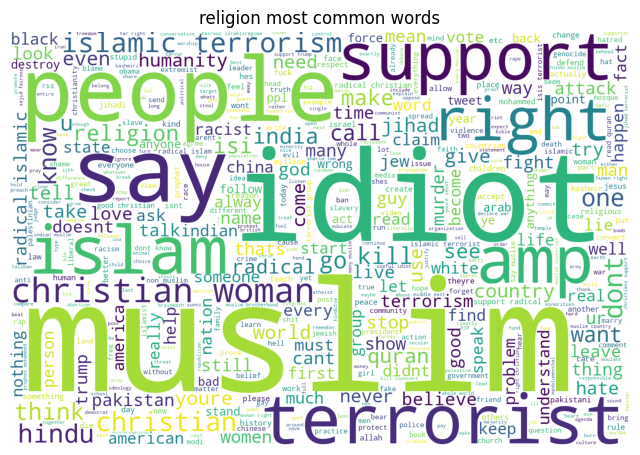

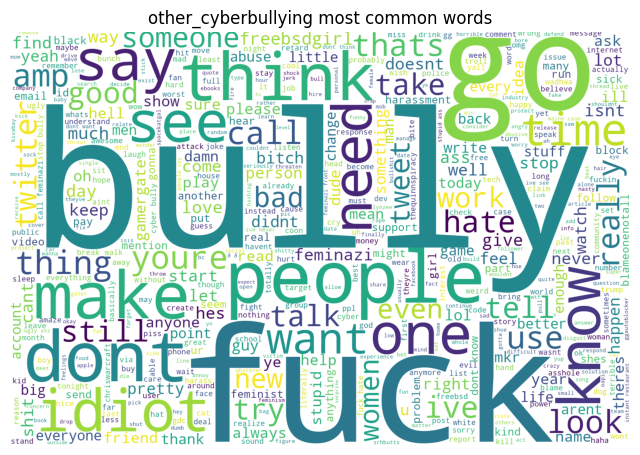

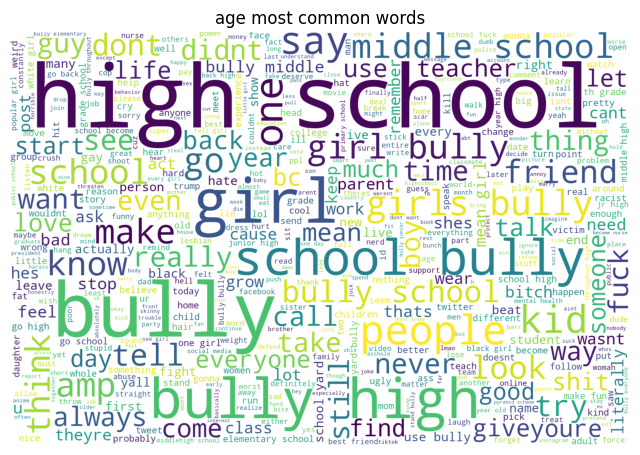

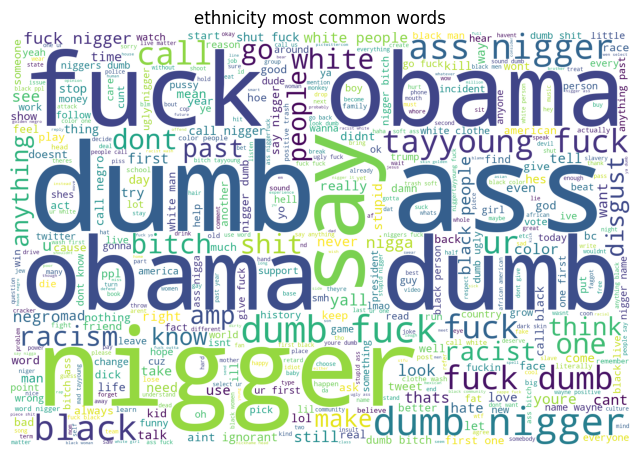

In [18]:
# Wordcloud

for t in df['cyberbullying_type'].unique(): # iterated through every category of cyberbullying
    empty_string = ''.join(df[df.cyberbullying_type == t].tweet_text.values) # generate wordclouds for each cyberbullying class

    plt.figure(figsize=(8,8))
    wc = WordCloud(background_color="white", max_words=500, width=1500, height=1000)
    wc.generate(empty_string)

    plt.imshow(wc)
    plt.title(t+' most common words')
    plt.axis('off')

In [19]:
# N-Grams Gender

from sklearn.feature_extraction.text import CountVectorizer # used CountVectorizer to find n-grams
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word') # n-gram range of 1,1 = unigrams
sparse_matrix = word_vectorizer.fit_transform(df[df.cyberbullying_type == 'gender'].tweet_text.values)
frequencies = sum(sparse_matrix).toarray()[0]
top_unigrams_gender = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by = 'frequency', ascending = False)[:10]

In [20]:
top_unigrams_gender

,frequency
joke,5347
rape,4094
gay,3709
make,1718
call,1404
bitch,1159
people,997
like,977
sexist,954
dont,906


In [21]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word') # n-gram range of 2,2 = bigrams
sparse_matrix = word_vectorizer.fit_transform(df[df.cyberbullying_type == 'gender'].tweet_text.values)
frequencies = sum(sparse_matrix).toarray()[0]
top_bigrams_gender = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by = 'frequency', ascending = False)[:10]

In [22]:
top_bigrams_gender

,frequency
rape joke,2152
gay joke,755
joke rape,452
joke gay,446
gay rape,408
make rape,393
make joke,241
gay people,226
call female,203
make gay,201


C:\Users\sprem\AppData\Local\Temp\ipykernel_10068\3905038595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_unigrams_gender, y=top_unigrams_gender.index, x = top_unigrams_gender.frequency, palette = "rocket_r")
C:\Users\sprem\AppData\Local\Temp\ipykernel_10068\3905038595.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_bigrams_gender, y=top_bigrams_gender.index, x = top_bigrams_gender.frequency, palette = "rocket_r")


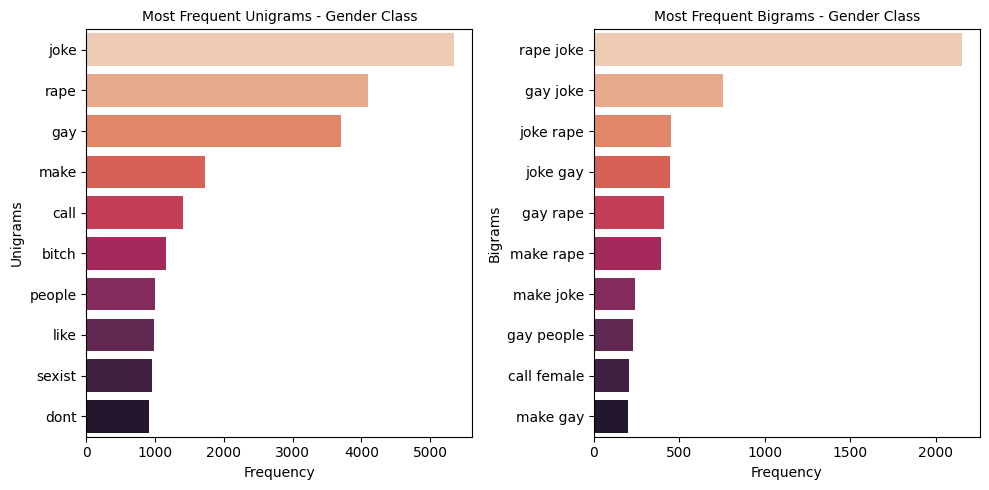

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ax = sns.barplot(data = top_unigrams_gender, y=top_unigrams_gender.index, x = top_unigrams_gender.frequency, palette = "rocket_r")
plt.title("Most Frequent Unigrams - Gender Class", fontsize = 10)
plt.ylabel('Unigrams', fontsize= 10)
plt.xlabel('Frequency', fontsize= 10)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.subplot(1,2,2)
ax = sns.barplot(data = top_bigrams_gender, y=top_bigrams_gender.index, x = top_bigrams_gender.frequency, palette = "rocket_r")
plt.title("Most Frequent Bigrams - Gender Class", fontsize = 10)
plt.ylabel('Bigrams', fontsize= 10)
plt.xlabel('Frequency', fontsize= 10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

In [24]:
# RELIGION

from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df.cyberbullying_type == 'religion'].tweet_text.values)
frequencies = sum(sparse_matrix).toarray()[0]
top_unigrams_religion = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by = 'frequency', ascending = False)[:10]
top_unigrams_religion

,frequency
muslims,2373
muslim,2272
idiot,1730
christian,1483
idiots,1337
right,1301
islamic,1262
like,1261
support,1201
dont,1191


In [25]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df.cyberbullying_type == 'religion'].tweet_text.values)
frequencies = sum(sparse_matrix).toarray()[0]
top_bigrams_religion = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by = 'frequency', ascending = False)[:10]
top_bigrams_religion

,frequency
islamic terrorism,819
christian woman,806
radical islamic,214
idiots like,126
support radical,121
good christian,104
dont know,94
radical islam,84
read quran,79
woman right,76


C:\Users\sprem\AppData\Local\Temp\ipykernel_10068\2424186465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_unigrams_religion, y=top_unigrams_religion.index, x = top_unigrams_religion.frequency, palette = "rocket_r")
C:\Users\sprem\AppData\Local\Temp\ipykernel_10068\2424186465.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_bigrams_religion, y=top_bigrams_religion.index, x = top_bigrams_religion.frequency, palette = "rocket_r")


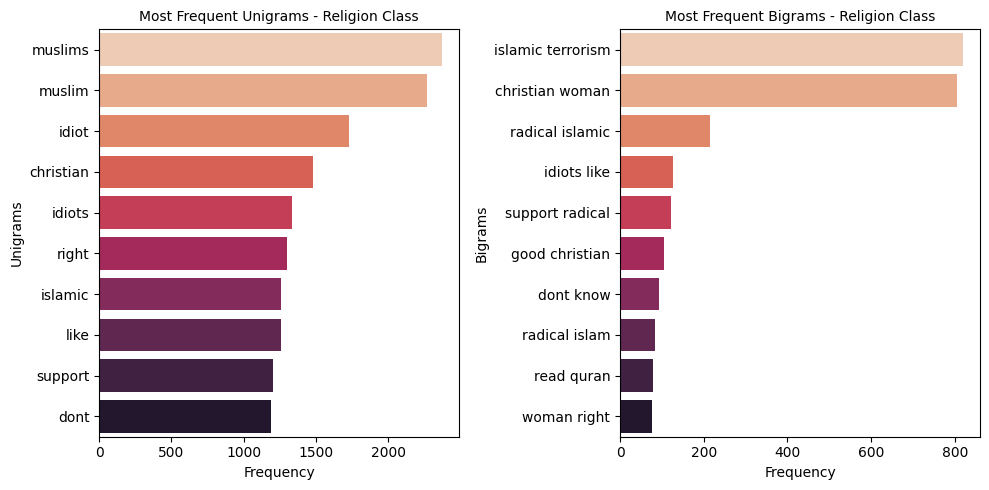

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ax = sns.barplot(data = top_unigrams_religion, y=top_unigrams_religion.index, x = top_unigrams_religion.frequency, palette = "rocket_r")
plt.title("Most Frequent Unigrams - Religion Class", fontsize = 10)
plt.ylabel('Unigrams', fontsize= 10)
plt.xlabel('Frequency', fontsize= 10)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.subplot(1,2,2)
ax = sns.barplot(data = top_bigrams_religion, y=top_bigrams_religion.index, x = top_bigrams_religion.frequency, palette = "rocket_r")
plt.title("Most Frequent Bigrams - Religion Class", fontsize = 10)
plt.ylabel('Bigrams', fontsize= 10)
plt.xlabel('Frequency', fontsize= 10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

In [27]:
# AGE

from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df.cyberbullying_type == 'age'].tweet_text.values)
frequencies = sum(sparse_matrix).toarray()[0]
top_unigrams_age = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by = 'frequency', ascending = False)[:10]
top_unigrams_age

,frequency
bully,9031
school,8546
high,4941
girls,2348
girl,2317
like,2068
get,1899
go,946
one,945
people,935


In [28]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df.cyberbullying_type == 'age'].tweet_text.values)
frequencies = sum(sparse_matrix).toarray()[0]
top_bigrams_age = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by = 'frequency', ascending = False)[:10]
top_bigrams_age

,frequency
high school,4525
bully high,1535
school bully,1438
girls bully,785
get bully,721
girl bully,641
middle school,577
bully school,495
look like,243
girls high,242


C:\Users\sprem\AppData\Local\Temp\ipykernel_10068\3944648523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_unigrams_age, y=top_unigrams_age.index, x = top_unigrams_age.frequency, palette = "rocket_r")
C:\Users\sprem\AppData\Local\Temp\ipykernel_10068\3944648523.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_bigrams_age, y=top_bigrams_age.index, x = top_bigrams_age.frequency, palette = "rocket_r")


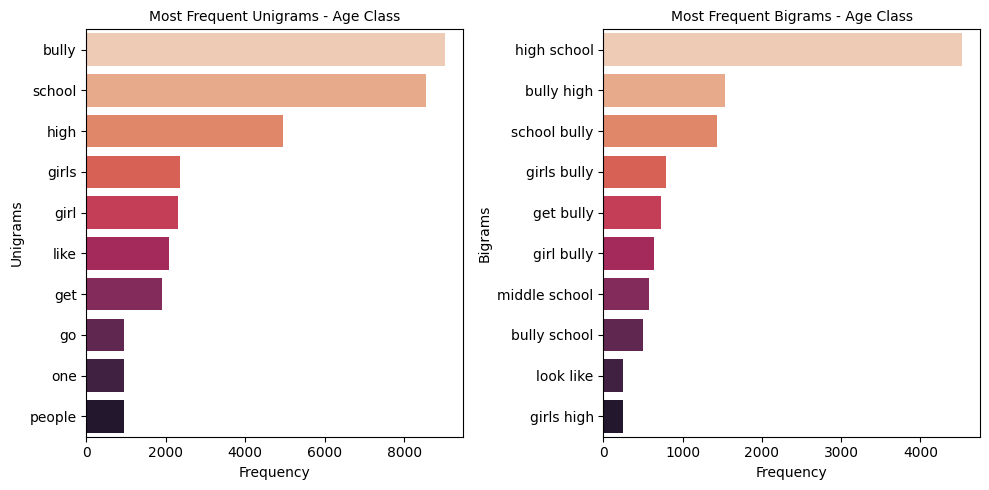

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ax = sns.barplot(data = top_unigrams_age, y=top_unigrams_age.index, x = top_unigrams_age.frequency, palette = "rocket_r")
plt.title("Most Frequent Unigrams - Age Class", fontsize = 10)
plt.ylabel('Unigrams', fontsize= 10)
plt.xlabel('Frequency', fontsize= 10)
plt.tick_params(axis='both', which='major', labelsize=10)


plt.subplot(1,2,2)
ax = sns.barplot(data = top_bigrams_age, y=top_bigrams_age.index, x = top_bigrams_age.frequency, palette = "rocket_r")
plt.title("Most Frequent Bigrams - Age Class", fontsize = 10)
plt.ylabel('Bigrams', fontsize= 10)
plt.xlabel('Frequency', fontsize= 10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

In [30]:
# Ethnicity

from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df.cyberbullying_type == 'ethnicity'].tweet_text.values)
frequencies = sum(sparse_matrix).toarray()[0]
top_unigrams_ethnicity = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by = 'frequency', ascending = False)[:10]
top_unigrams_ethnicity

,frequency
fuck,6074
dumb,5163
nigger,4328
ass,2267
black,2157
white,1571
call,1384
niggers,1305
say,1192
people,1187


In [31]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df.cyberbullying_type == 'ethnicity'].tweet_text.values)
frequencies = sum(sparse_matrix).toarray()[0]
top_bigrams_ethnicity = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by = 'frequency', ascending = False)[:10]
top_bigrams_ethnicity

,frequency
dumb ass,1538
ass nigger,1156
dumb fuck,1118
fuck obama,998
obama dumb,980
dumb nigger,945
tayyoung fuck,919
fuck dumb,739
black people,348
fuck nigger,301


C:\Users\sprem\AppData\Local\Temp\ipykernel_10068\1753152379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_unigrams_ethnicity, y=top_unigrams_ethnicity.index, x = top_unigrams_ethnicity.frequency, palette = "rocket_r")
C:\Users\sprem\AppData\Local\Temp\ipykernel_10068\1753152379.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_bigrams_ethnicity, y=top_bigrams_ethnicity.index, x = top_bigrams_ethnicity.frequency, palette = "rocket_r")


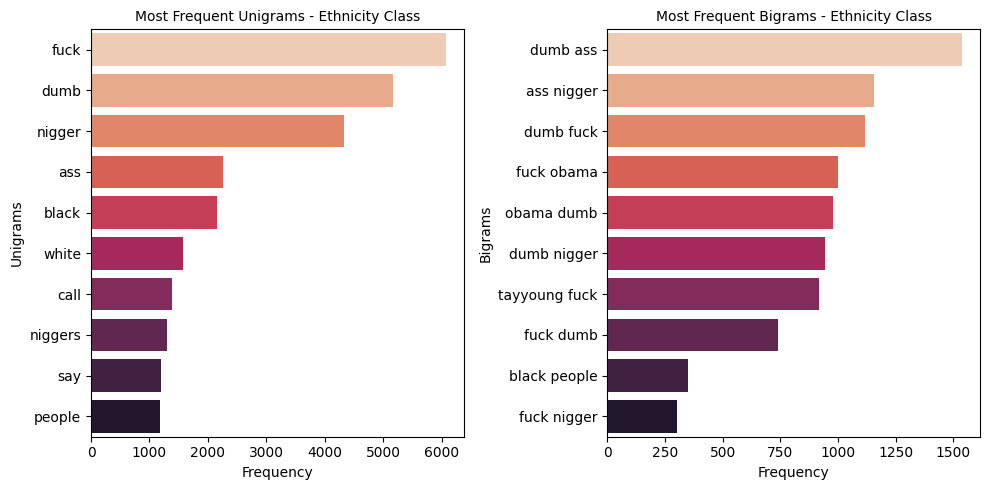

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ax = sns.barplot(data = top_unigrams_ethnicity, y=top_unigrams_ethnicity.index, x = top_unigrams_ethnicity.frequency, palette = "rocket_r")
plt.title("Most Frequent Unigrams - Ethnicity Class", fontsize = 10)
plt.ylabel('Unigrams', fontsize= 10)
plt.xlabel('Frequency', fontsize= 10)
plt.tick_params(axis='both', which='major', labelsize=10)


plt.subplot(1,2,2)
ax = sns.barplot(data = top_bigrams_ethnicity, y=top_bigrams_ethnicity.index, x = top_bigrams_ethnicity.frequency, palette = "rocket_r")
plt.title("Most Frequent Bigrams - Ethnicity Class", fontsize = 10)
plt.ylabel('Bigrams', fontsize= 10)
plt.xlabel('Frequency', fontsize= 10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

In [33]:
# Converting Text to Numerical Values (Vectorization)

label_encoder = preprocessing.LabelEncoder()  # convert classes to numerical values for modeling

# Encode labels in column 'cyberbullying_type'
df['cyberbullying_type']= label_encoder.fit_transform(df['cyberbullying_type'])
df['cyberbullying_type'].unique()

array([3, 2, 5, 4, 0, 1])

In [34]:
# Calculate TF-IDF
tv=TfidfVectorizer(max_features = 5000) # converting text to numerical values via tfidf vectorizer
tv_df = tv.fit_transform(df['tweet_text'])

In [35]:
# Modeling

# train_test_split

X = tv_df.toarray() # partioning data into test and train test
y = df['cyberbullying_type']

In [36]:
# Naive Bayes' Classifier

X = tv_df.toarray() # partioning data into test and train test
y = df['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.naive_bayes import MultinomialNB # Naive Bayes Classifier
mnb_cl=MultinomialNB()
mnb_cl.fit(X_train, y_train)
mnb_pred = mnb_cl.predict(X_test)

In [37]:
print('Classification Report for Naive Bayes:\n',classification_report(pd.Series(label_encoder.inverse_transform(y_test)), pd.Series(label_encoder.inverse_transform(mnb_pred))))

Classification Report for Naive Bayes:
                      precision    recall  f1-score   support

                age       0.71      0.97      0.82      1545
          ethnicity       0.87      0.92      0.89      1635
             gender       0.84      0.82      0.83      1548
  not_cyberbullying       0.66      0.47      0.55      1638
other_cyberbullying       0.60      0.40      0.48      1267
           religion       0.82      0.97      0.89      1571

           accuracy                           0.77      9204
          macro avg       0.75      0.76      0.74      9204
       weighted avg       0.75      0.77      0.75      9204



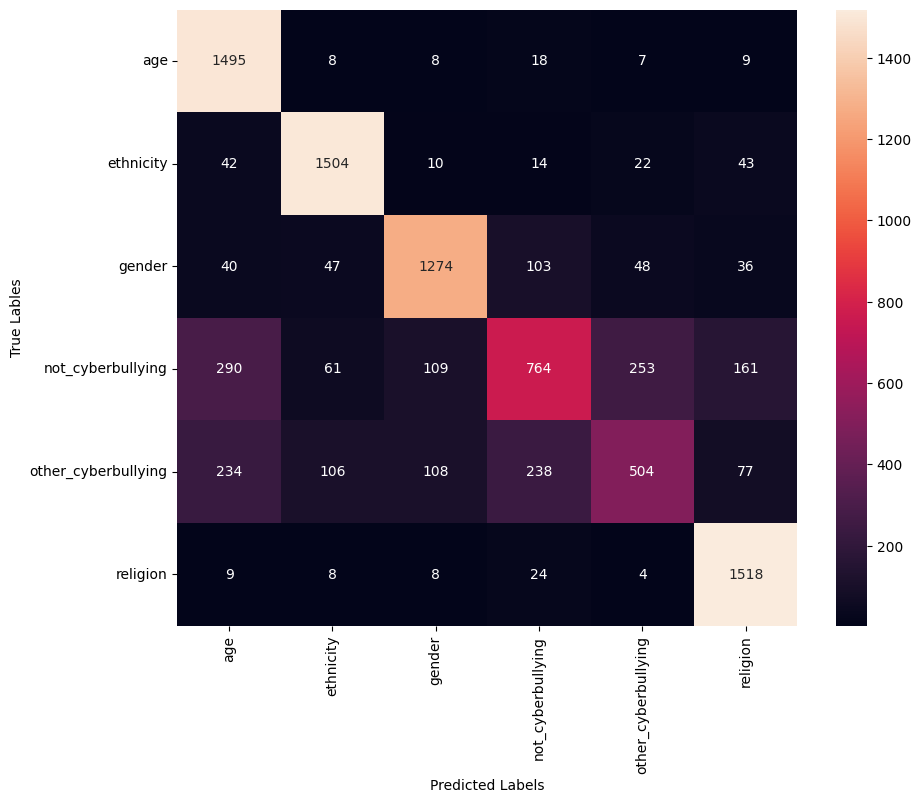

In [38]:
plt.figure(figsize=(10,8))
cm_labels = np.unique(label_encoder.inverse_transform(y_test))
cm = confusion_matrix(y_test, mnb_pred)
cm_df = pd.DataFrame(cm, index = cm_labels, columns = cm_labels)

ax = sns.heatmap(cm_df, annot=True, fmt='d')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Lables')

plt.show();

In [45]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(random_state = 50) # random forest classifier
rf_cl.fit(X_train, y_train)

rf_pred = rf_cl.predict(X_test)

In [46]:
print('Classification Report for Random Forest:\n',classification_report(pd.Series(label_encoder.inverse_transform(y_test)), pd.Series(label_encoder.inverse_transform(rf_pred))))

Classification Report for Random Forest:
                      precision    recall  f1-score   support

                age       0.97      0.98      0.97      1545
          ethnicity       0.99      0.98      0.99      1635
             gender       0.90      0.87      0.88      1548
  not_cyberbullying       0.65      0.63      0.64      1638
other_cyberbullying       0.60      0.64      0.62      1267
           religion       0.95      0.96      0.95      1571

           accuracy                           0.85      9204
          macro avg       0.84      0.84      0.84      9204
       weighted avg       0.85      0.85      0.85      9204



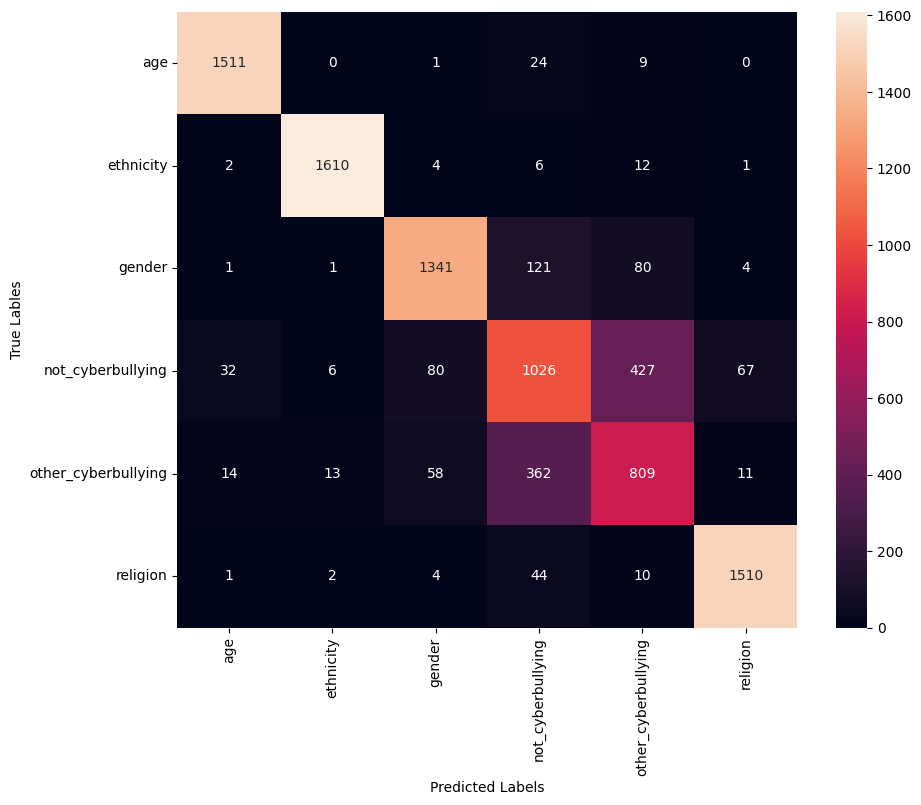

In [47]:
plt.figure(figsize=(10,8))
cm_labels = np.unique(label_encoder.inverse_transform(y_test))
cm = confusion_matrix(y_test, rf_pred)
cm_df = pd.DataFrame(cm, index = cm_labels, columns = cm_labels)

ax = sns.heatmap(cm_df, annot=True, fmt='d')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Lables')

plt.show();

In [48]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_cl = LogisticRegression(solver='lbfgs', max_iter=1000) # logistic regression classifier
lr_cl.fit(X_train, y_train)

lr_pred = lr_cl.predict(X_test)

In [49]:
print('Classification Report for Logistic Regression:\n',classification_report(pd.Series(label_encoder.inverse_transform(y_test)), pd.Series(label_encoder.inverse_transform(lr_pred))))

Classification Report for Logistic Regression:
                      precision    recall  f1-score   support

                age       0.95      0.96      0.96      1545
          ethnicity       0.98      0.98      0.98      1635
             gender       0.91      0.86      0.88      1548
  not_cyberbullying       0.63      0.66      0.64      1638
other_cyberbullying       0.60      0.59      0.59      1267
           religion       0.94      0.95      0.95      1571

           accuracy                           0.84      9204
          macro avg       0.83      0.83      0.83      9204
       weighted avg       0.84      0.84      0.84      9204



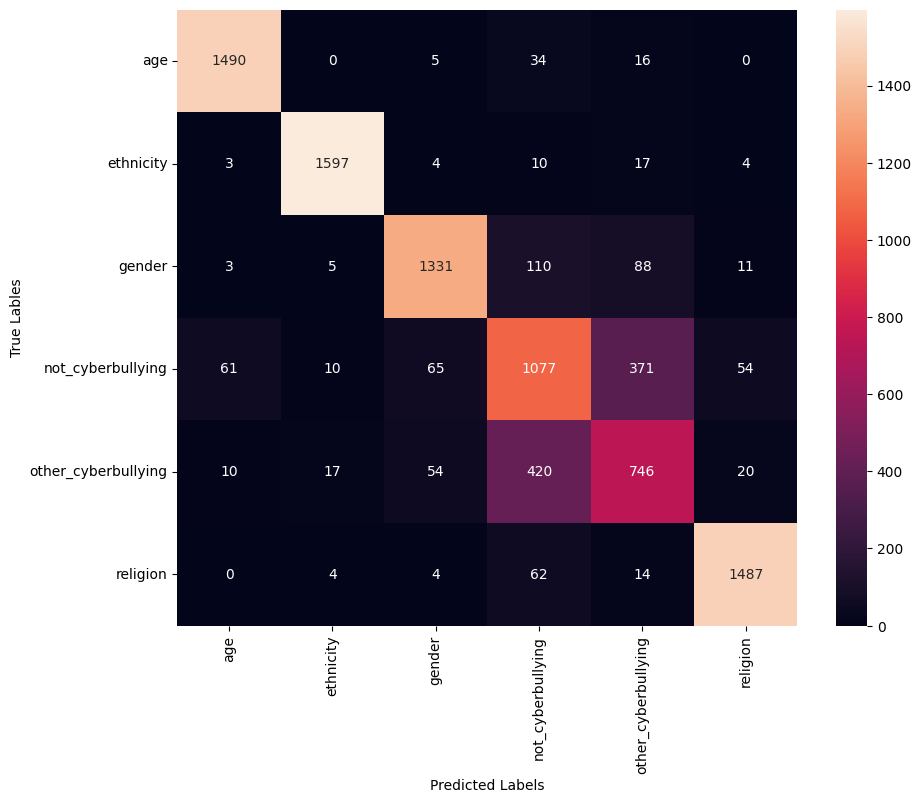

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,8))
cm_labels = np.unique(label_encoder.inverse_transform(y_test))
cm = confusion_matrix(y_test, lr_pred)
cm_df = pd.DataFrame(cm, index = cm_labels, columns = cm_labels)

ax = sns.heatmap(cm_df, annot=True, fmt='d')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Lables')

plt.show();